In [6]:
#https://habr.com/ru/post/464823/
    
import requests
import pandas as pd

number_of_pages = 200
#number_of_ads = number_of_pages * per_page

job_title = ["'Data Analyst' and 'data scientist'"]
#job_title=['Data Analyst', 'Data Scientist']

#https://hh.ru/article/309400

for job in job_title:
    data=[]
    for i in range(number_of_pages):
        url = 'https://api.hh.ru/vacancies'
        par = {'text': job, 'area':'1','per_page':'10', 'page':i}
        r = requests.get(url, params=par)
        e=r.json()
        data.append(e)
        vacancy_details = data[0]['items'][0].keys()
        df = pd.DataFrame(columns= list(vacancy_details))
        ind = 0
        for i in range(len(data)):
            for j in range(len(data[i]['items'])):
                df.loc[ind] = data[i]['items'][j]
                ind+=1
    #csv_name = job+".csv"
    csv_name = "data_scientist.csv"
    df.to_csv(csv_name)

In [2]:
df = pd.read_csv("data_scientist.csv")
df.head()

,Unnamed: 0,id,premium,name,department,has_test,response_letter_required,area,salary,type,...,alternate_url,relations,employer,snippet,contacts,schedule,working_days,working_time_intervals,working_time_modes,accept_temporary
0,0,48929537,False,Data Analyst / Data Scientist,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 70000, 'to': 200000, 'currency': 'RUR...","{'id': 'open', 'name': 'Открытая'}",...,https://hh.ru/vacancy/48929537,[],"{'id': '1870134', 'name': 'Национальное Бюро И...",{'requirement': 'Существенным преимуществом бу...,NaN,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False
1,1,45191074,False,Data Scientist,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': None, 'to': 300000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,https://hh.ru/vacancy/45191074,[],"{'id': '2324020', 'name': 'Точка', 'url': 'htt...",{'requirement': 'Есть опыт работы с методами м...,NaN,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False
2,2,48276976,False,Data scientist / Product analyst,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 200000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,https://hh.ru/vacancy/48276976,[],"{'id': '2652595', 'name': 'Bip.ru', 'url': 'ht...",{'requirement': 'Опыт работы <highlighttext>ан...,NaN,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False
3,3,48975806,False,Инженер данных (Data Engineer),NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 200000, 'to': 250000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",...,https://hh.ru/vacancy/48975806,[],"{'id': '4021338', 'name': 'Студия Данных', 'ur...",{'requirement': 'Опыт работы от 3-х лет в обла...,NaN,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],True
4,4,49076838,False,Data Engineer,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 2000, 'to': 3000, 'currency': 'USD', ...","{'id': 'open', 'name': 'Открытая'}",...,https://hh.ru/vacancy/49076838,[],"{'id': '5810420', 'name': 'B9', 'url': 'https:...",{'requirement': 'Good knowledge of any modern ...,NaN,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],True


In [3]:
import ast # run code from string for example ast.literal_eval("1+1") 

salaries = df.salary.dropna() # remove all NA's from dataframe
currencies = [ast.literal_eval(salaries.iloc[i])['currency'] for i in range(len(salaries))]
curr = set(currencies) #{'EUR', 'RUR', 'USD'}

#divide dataframe salararies by currency
rur = [ast.literal_eval(salaries.iloc[i]) for i in range(len(salaries)) if ast.literal_eval(salaries.iloc[i])['currency']=='RUR']
eur = [ast.literal_eval(salaries.iloc[i]) for i in range(len(salaries)) if ast.literal_eval(salaries.iloc[i])['currency']=='EUR']
usd = [ast.literal_eval(salaries.iloc[i]) for i in range(len(salaries)) if ast.literal_eval(salaries.iloc[i])['currency']=='USD']

In [4]:
fr = [x['from'] for x in rur] # lower range of salary
fr = list(filter(lambda x: x is not None, fr)) # remove NA's from lower range [0, 100, 200,...]

to = [x['to'] for x in rur] #upper range of salary
to = list(filter(lambda x: x is not None, to)) #remove NA's from upper range [100, 200, 300,...]

import numpy as np
salary_range = list(zip(fr, to)) # concatenate upper and lower range  [(0,100), (100, 200), (200, 300)...]
av = map(np.mean, salary_range) # convert [(0,100), (100, 200), (200, 300)...] to [50, 150, 250,...]
av = round(np.mean(list(av)),1) # average value from [50, 150, 250,...]

print("average salary as Data Scientist ", av, "rubles")

average salary as Data Scientist  228000.0 rubles


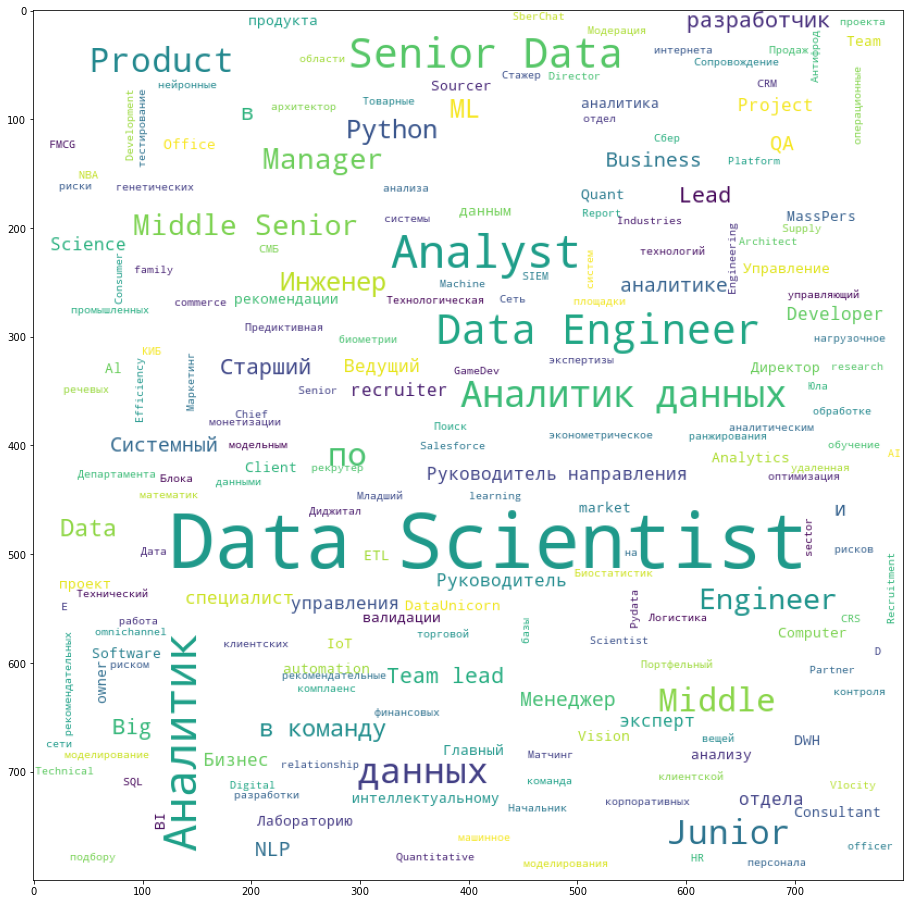

In [5]:
from collections import Counter

vacancy_names = df.name # change here to change source of data/words etc
cloud = Counter(vacancy_names)
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
cloud = ''
for x in list(vacancy_names):
    cloud+=x+' '
wordcloud = WordCloud(width = 800, height = 800,
                stopwords = stopwords, 
                min_font_size = 8,background_color='white'
                     ).generate(cloud)

import matplotlib.pylab as plt
plt.figure(figsize = (16, 16)) 
plt.imshow(wordcloud)
plt.savefig('Data_Scientist_vacancy_cloud.png')